## Model: MSCAP

In [1]:
# -*- coding: utf8 -*-
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
from keras.models import Sequential
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.utils import np_utils,plot_model
from sklearn.model_selection import cross_val_score,train_test_split
from keras.layers import Dense, Dropout,Flatten,Conv1D,MaxPooling1D,AveragePooling1D
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Model
from keras.layers import Input
from sklearn import preprocessing

2023-10-10 21:30:35.660306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 21:30:36.649196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib
2023-10-10 21:30:36.649327: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib
2023-10-10 21:30:36.649339: W tensorflow/compiler/tf2tensorrt/utils/py_u

### input

In [2]:
%%time
df_raw = pd.read_csv('../datasets/all_healthy_data.csv')

CPU times: user 2min 21s, sys: 5.83 s, total: 2min 27s
Wall time: 2min 27s


In [3]:
df_raw.shape

(11543, 25980)

In [4]:
df_raw

,Unnamed: 0,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,...,cg27653134,cg27654142,cg27655855,cg27655905,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659,Age
0,GSM1500896,0.540079,0.564492,0.044907,0.699895,0.064083,0.042312,0.856228,0.072350,0.044770,...,0.710663,0.066649,0.837245,0.057018,0.049503,0.356949,0.069238,0.040596,0.126728,71.000000
1,GSM1500897,0.562377,0.563360,0.065536,0.639487,0.068047,0.037802,0.828050,0.081527,0.056482,...,0.686128,0.070768,0.794794,0.057936,0.047380,0.256544,0.064016,0.051418,0.122267,62.000000
2,GSM1500898,0.586262,0.556159,0.053013,0.592859,0.072489,0.042100,0.842531,0.075749,0.051566,...,0.719266,0.086908,0.827737,0.078091,0.053606,0.365556,0.054088,0.049267,0.155096,77.000000
3,GSM1500899,0.515197,0.582909,0.049645,0.764413,0.057259,0.035079,0.867209,0.060494,0.050152,...,0.657433,0.078306,0.788525,0.052291,0.053358,0.269563,0.064488,0.047505,0.138939,79.000000
4,GSM1500900,0.617524,0.604762,0.048714,0.436787,0.086947,0.038958,0.858944,0.079839,0.046829,...,0.698988,0.084030,0.799059,0.049743,0.036543,0.277516,0.060048,0.054901,0.115813,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11538,GSM1400057,0.813192,0.851833,0.063641,0.133013,0.083006,0.044553,0.954777,0.036731,0.018631,...,0.773726,0.096861,0.773328,0.057141,0.051934,0.231402,0.025213,0.040151,0.035339,49.078713
11539,GSM1400058,0.786084,0.817049,0.047396,0.126858,0.076139,0.037249,0.964076,0.036162,0.018507,...,0.774994,0.121388,0.776687,0.053314,0.068269,0.299261,0.022777,0.054795,0.036373,49.078713
11540,GSM1400059,0.743025,0.851950,0.053379,0.132240,0.068600,0.044420,0.960228,0.029354,0.019296,...,0.760733,0.047803,0.804805,0.056035,0.041141,0.230789,0.025726,0.045395,0.034314,55.622177
11541,GSM1400060,0.748376,0.813206,0.037265,0.122670,0.066083,0.049799,0.969954,0.033139,0.016395,...,0.784722,0.039983,0.381791,0.045590,0.029172,0.342303,0.022631,0.047357,0.030372,56.481862


In [5]:
#行列名保存下来
row_indices = df_raw['Unnamed: 0'].tolist()
column_names = df_raw.columns.values


In [6]:
#将第一列删除
del df_raw['Unnamed: 0']
#行名变为样本名
df_raw.index = row_indices
df_raw

,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00011459,...,cg27653134,cg27654142,cg27655855,cg27655905,cg27657283,cg27661264,cg27662379,cg27662877,cg27665659,Age
GSM1500896,0.540079,0.564492,0.044907,0.699895,0.064083,0.042312,0.856228,0.072350,0.044770,0.848418,...,0.710663,0.066649,0.837245,0.057018,0.049503,0.356949,0.069238,0.040596,0.126728,71.000000
GSM1500897,0.562377,0.563360,0.065536,0.639487,0.068047,0.037802,0.828050,0.081527,0.056482,0.827373,...,0.686128,0.070768,0.794794,0.057936,0.047380,0.256544,0.064016,0.051418,0.122267,62.000000
GSM1500898,0.586262,0.556159,0.053013,0.592859,0.072489,0.042100,0.842531,0.075749,0.051566,0.814106,...,0.719266,0.086908,0.827737,0.078091,0.053606,0.365556,0.054088,0.049267,0.155096,77.000000
GSM1500899,0.515197,0.582909,0.049645,0.764413,0.057259,0.035079,0.867209,0.060494,0.050152,0.834977,...,0.657433,0.078306,0.788525,0.052291,0.053358,0.269563,0.064488,0.047505,0.138939,79.000000
GSM1500900,0.617524,0.604762,0.048714,0.436787,0.086947,0.038958,0.858944,0.079839,0.046829,0.856805,...,0.698988,0.084030,0.799059,0.049743,0.036543,0.277516,0.060048,0.054901,0.115813,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1400057,0.813192,0.851833,0.063641,0.133013,0.083006,0.044553,0.954777,0.036731,0.018631,0.860106,...,0.773726,0.096861,0.773328,0.057141,0.051934,0.231402,0.025213,0.040151,0.035339,49.078713
GSM1400058,0.786084,0.817049,0.047396,0.126858,0.076139,0.037249,0.964076,0.036162,0.018507,0.865197,...,0.774994,0.121388,0.776687,0.053314,0.068269,0.299261,0.022777,0.054795,0.036373,49.078713
GSM1400059,0.743025,0.851950,0.053379,0.132240,0.068600,0.044420,0.960228,0.029354,0.019296,0.917653,...,0.760733,0.047803,0.804805,0.056035,0.041141,0.230789,0.025726,0.045395,0.034314,55.622177
GSM1400060,0.748376,0.813206,0.037265,0.122670,0.066083,0.049799,0.969954,0.033139,0.016395,0.918028,...,0.784722,0.039983,0.381791,0.045590,0.029172,0.342303,0.022631,0.047357,0.030372,56.481862


In [7]:
# 提取特征列
X = df_raw.iloc[:, :-1].values
X = np.expand_dims(X.astype(float), axis=2)#增加一维轴
# 提取标签列
y = df_raw.iloc[:, -1].values
X.shape,y.shape

((11543, 25978, 1), (11543,))

### Divide the dataset

In [8]:
# 划分训练集，测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model

In [18]:
def Block(input):
    input_shape = Input(shape=(X_train.shape[1],1))
    
    #1st layer 如果卷积时，设置padding的属性值是 SAME ，则表示输出层尺寸 = 输入层尺寸
    layer_1 = Conv1D(1,1,padding = 'same',activation='relu')(input)
    dropout1 = Dropout(0.2)(layer_1)
    #2nd layer
    layer_2_1 = Conv1D(1, 1, padding='same', activation='relu')(input)
    layer_2_2 = Conv1D(1, 8, padding='same', activation='relu')(layer_2_1)
    dropout2 = Dropout(0.2)(layer_2_2)
    #3rd layer
    layer_3_1 = Conv1D(1, 1, padding='same', activation='relu')(input)
    layer_3_2 = Conv1D(1, 16, padding='same', activation='relu')(layer_3_1)
    layer_3_3 = Conv1D(1, 16, padding='same', activation='relu')(layer_3_2)
    dropout3 = Dropout(0.2)(layer_3_3)
    #4st layer
    layer_4_1 = Conv1D(1, 1, padding='same', activation='relu')(input)
    layer_4_2 = Conv1D(1, 32, padding='same', activation='relu')(layer_4_1)
    layer_4_3 = Conv1D(1, 32, padding='same', activation='relu')(layer_4_2)
    layer_4_4 = Conv1D(1, 32, padding='same', activation='relu')(layer_4_3)
    dropout4 = Dropout(0.2)(layer_4_4)

    output = keras.layers.concatenate([dropout1, dropout2, dropout3,dropout4], axis = 2)
    return output

In [19]:
#输入
input_shape = Input(shape=(X_train.shape[1],1))
#全连接层1
fc1 = Dense(512, activation='relu')(input_shape)
fc2 = Dense(25789, activation='linear')(fc1)
#调用block，构成MSCNN模块
#第一列
block1 = Block(fc2)
block2 = Block(fc2)
block3 = Block(fc2)
block4 = Block(fc2)
#第二列
block5 = Block(block2)
block6 = Block(block3)
block7 = Block(block4)
#第三列
block8 = Block(block6)
block9 = Block(block7)
#第四列
block10 = Block(block9)
#合并
MSCNN = keras.layers.concatenate([block1, block5, block8，block10, axis = 2)

flat_1 = Flatten()(MSCNN)
output1 = Dense(16, activation='relu')(flat_1)
dropout = Dropout(0.2)(output1)
output = Dense(1, activation='linear')(dropout)

model = Model([input_shape], output)
model.summary()
adam = keras.optimizers.adam_v2.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae'])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 25978, 1)]   0           []                               
                                                                                                  
 conv1d_123 (Conv1D)            (None, 25978, 1)     2           ['input_16[0][0]']               
                                                                                                  
 conv1d_121 (Conv1D)            (None, 25978, 1)     2           ['input_16[0][0]']               
                                                                                                  
 conv1d_124 (Conv1D)            (None, 25978, 1)     129         ['conv1d_123[0][0]']             
                                                                                            

### batch_size过大或者其他原因可能会导致占用内存过大，因此训练模型前可以提前释放一下服务器上

In [20]:
from keras.backend import set_session
from keras.backend import clear_session
from keras.backend import get_session
import tensorflow as tf
import gc
 
# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()
 
    try:
        del classifier # this is from global space - change this as you need
    except:
        pass
 
    print(gc.collect()) # if it does something you should see a number as output
 
    # use the same config as you used to create the session
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tf.compat.v1.Session(config=config))

In [21]:
reset_keras()

15155


2023-10-10 21:42:09.456925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 21:42:09.457346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 21:42:09.457585: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 21:42:09.457872: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 21:42:09.458092: I tensorflow/compiler/xla/stream_executo

In [22]:
# 训练模型
history = model.fit(X_train.astype(np.float32),Y_train.astype(np.float32), validation_data=(X_test.astype(np.float32), Y_test.astype(np.float32)),epochs=200, batch_size=128)

2023-10-10 21:42:18.352937: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 959523408 exceeds 10% of free system memory.
2023-10-10 21:42:19.816293: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 959523408 exceeds 10% of free system memory.


Epoch 1/200


2023-10-10 21:42:28.116971: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700


73/73 [==============================] - 182s 2s/step - loss: 901.4749 - mae: 24.9315 - val_loss: 673.5410 - val_mae: 22.1100
Epoch 2/200
73/73 [==============================] - 24s 322ms/step - loss: 708.0542 - mae: 22.3582 - val_loss: 598.1550 - val_mae: 20.7400
Epoch 3/200
73/73 [==============================] - 23s 321ms/step - loss: 631.4023 - mae: 20.8729 - val_loss: 544.6166 - val_mae: 19.4451
Epoch 4/200
73/73 [==============================] - 23s 321ms/step - loss: 581.0054 - mae: 19.8254 - val_loss: 483.0451 - val_mae: 18.2873
Epoch 5/200
73/73 [==============================] - 23s 320ms/step - loss: 529.5095 - mae: 18.7594 - val_loss: 441.5721 - val_mae: 17.4928
Epoch 6/200
73/73 [==============================] - 23s 321ms/step - loss: 495.4940 - mae: 18.0392 - val_loss: 398.6919 - val_mae: 16.5242
Epoch 7/200
73/73 [==============================] - 23s 321ms/step - loss: 456.0855 - mae: 17.1770 - val_loss: 363.4181 - val_mae: 15.6558
Epoch 8/200
73/73 [===============

### Loss函数

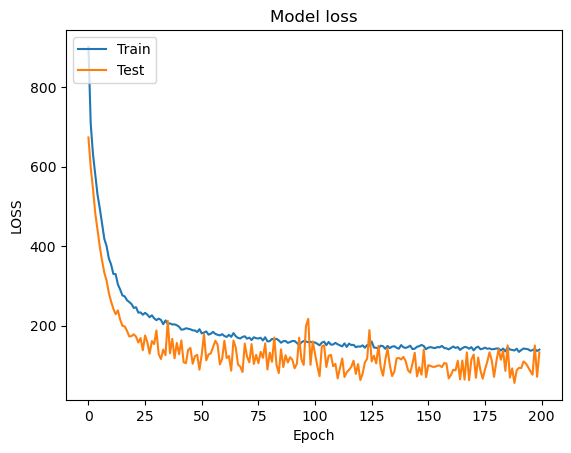

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('LOSS')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
import keras
from keras.models import load_model
# 保存训练好的model为hdf5文件
model.save('../model/save_model/model.h5')  
# 重新加载模型
# model = load_model('../model/save_model/model_selu.h5')

In [ ]:
# 获取模型权重
weights = model.get_weights() 
# 给模型权重赋值，注意列表中的数组必须与 get_weights() 返回的权重具有相同的尺寸。
model.set_weights(weights)

In [ ]:
import seaborn as sns
# train
predicted = model.predict(X_train)
y_pred = []
for i in predicted:
    y_pred.append(i[0])
y_pred = np.array(y_pred)
sns.scatterplot(Y_train, y_pred,color='black', s=3)
plt.legend(["Pred Age","y = x"])
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.show()


In [ ]:
import seaborn as sns

# test
predicted = model.predict(X_test)
y_pred = []
for i in predicted:
    y_pred.append(i[0])
y_pred = np.array(y_pred)
sns.scatterplot(Y_test, y_pred,color='black', s=3)
plt.legend(["Pred Age","y = x"])
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.show()


In [ ]:
#Metrics
from sklearn import metrics
from scipy.stats import pearsonr# R square way2
mad = round((np.median(np.abs(np.array(y_pred)-Y_test))),2)
mse = round((np.mean((np.array(y_pred)-Y_test) ** 2)),2)
rmse = round((np.sqrt(mse)),2)
pearsonR = round((pearsonr(Y_test, y_pred).statistic), 2)
pearsonR,mad,mse,rmse